# CLASIFICACION MULTICLASE

  + Predecir la columna especie del dataset penguins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# FALORES FALTANTES

In [3]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

numeric_cols  = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])


# CODIFICAR CATEGORICOS

* species
* island
* sex

LabelEncoder y OneHotEncoder

In [5]:
from sklearn.preprocessing import OneHotEncoder

# equivalente a pd.get_dummies drop_first=True
categoricals = df[['island', 'sex']]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

# Obtener los nuevos nombres de las nuevas columnas generadas: 'island_Dream', 'island_Torgersen', 'sex_Male'
column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

# Crear nuevo DataFrame con las nuevas columnas codificadas
df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head(2)

c:\Users\migue\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island_Dream,island_Torgersen,sex_Male
0,0.0,1.0,1.0
1,0.0,1.0,0.0


In [6]:
df = pd.concat([df, df_categoricals], axis=1)
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0


# EDAs

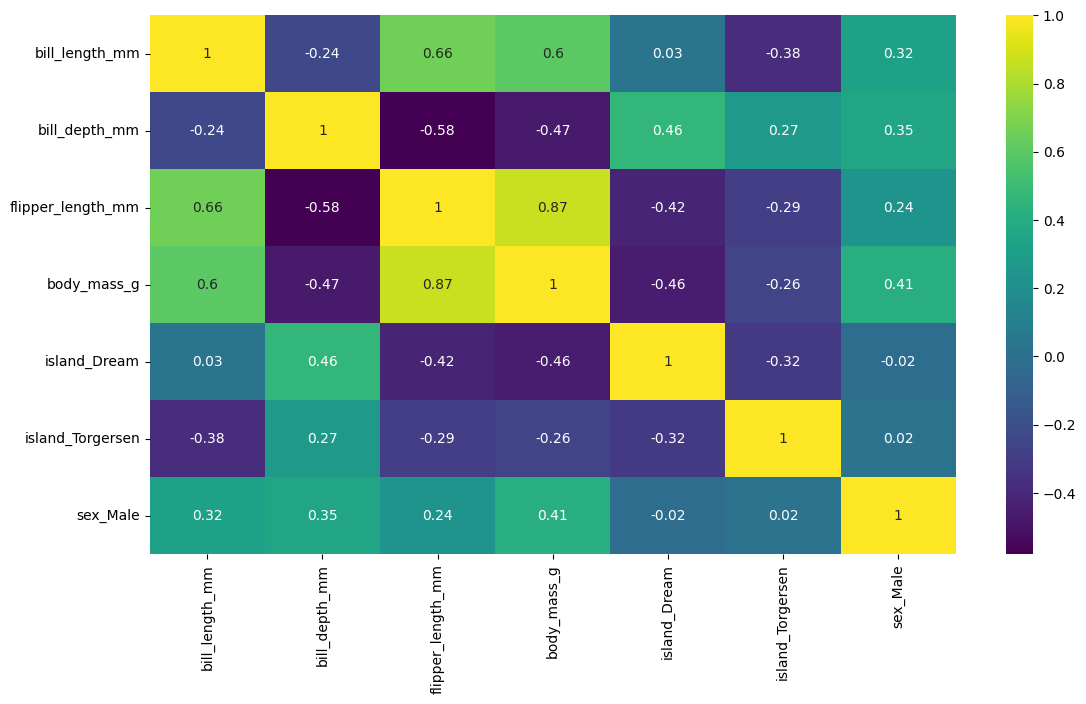

In [9]:
plt.figure(figsize=(13,7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

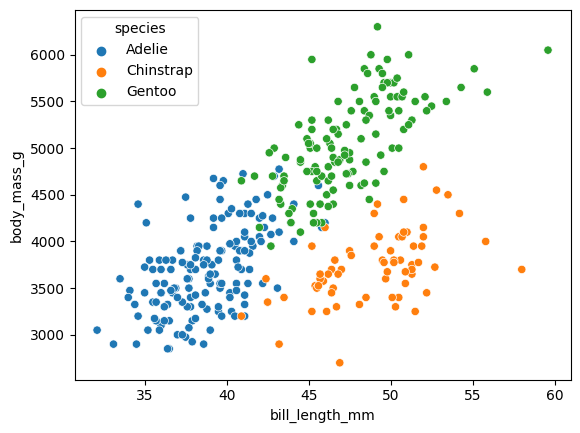

In [10]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')

[Text(0, 0, '152'), Text(0, 0, '68'), Text(0, 0, '124')]

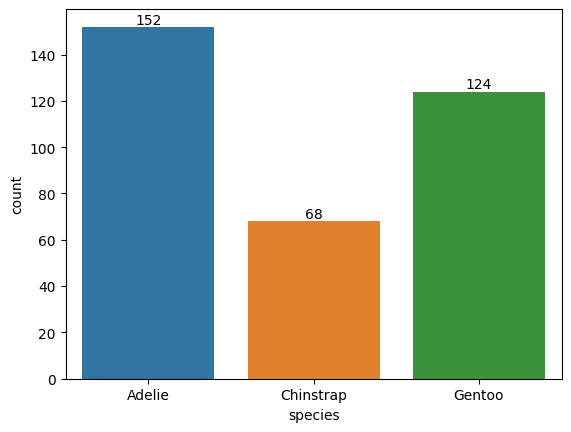

In [12]:
ax = sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0])

In [8]:
from sklearn.preprocessing import LabelEncoder

# codificar la variable de salida con LabelEncoder, valores: 0,1,2 todos en la misma columna
Label_encoder = LabelEncoder()
y = Label_encoder.fit_transform(df['species'])
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
y_train

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

# MODELADO

REGRESION LOGISTICA

KNEIGHBORSCLASSIFIER